In [ ]:
# default_exp fft

In [ ]:
#hide 
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
#export
from rtma.imports import *

# FFT

## Wave Generators

In [5]:
def gen_sinusoid(amp = 0.5, 
                 freq = 440.0,
                 len_seconds = None, 
                 num_samples = None, 
                 sample_rate = 44100,
                 phi = 0.0,
                ):
    if num_samples is None and len_seconds is not None:
        num_samples = len_seconds * sample_rate
    if num_samples is None:
        num_samples = sample_rate
    n = np.arange(num_samples)
    x = amp * np.cos(2.0 * np.pi * freq * n / sample_rate + phi)
    return x

In [6]:
x = gen_sinusoid(num_samples=1024)

((1024,), dtype('float64'))

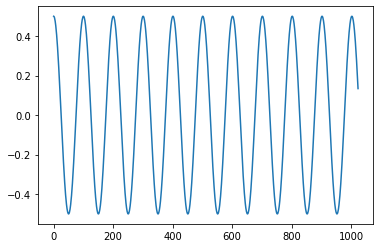

In [7]:
plt.plot(x)
x.shape, x.dtype

In [8]:
X = np.fft.rfft(x)
X.shape, X.dtype

((513,), dtype('complex128'))

In [9]:
mX, pX = abs(X), np.angle(X)

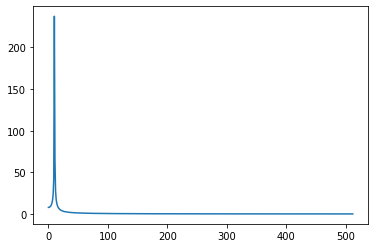

In [10]:
plt.plot(mX)

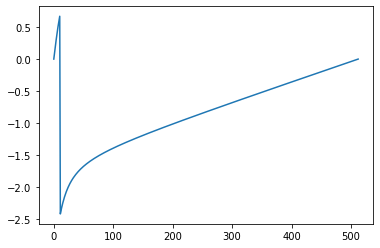

In [11]:
plt.plot(pX)

In [12]:
xh = np.fft.irfft(X)

In [13]:
xh.shape, xh.dtype

((1024,), dtype('float64'))

In [14]:
np.isclose(x, xh).all()

True

In [15]:
window = np.blackman(1023)

In [16]:
wx = x[:window.shape[0]] * window

In [17]:
wx = np.roll(wx, -512)

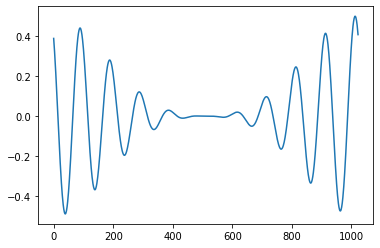

In [18]:
plt.plot(wx)

In [19]:
X = np.fft.rfft(x, n=1024)

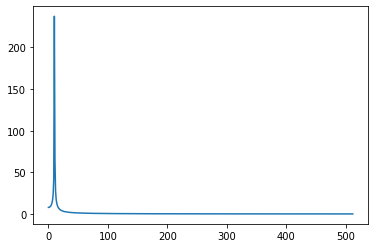

In [20]:
plt.plot(abs(X))

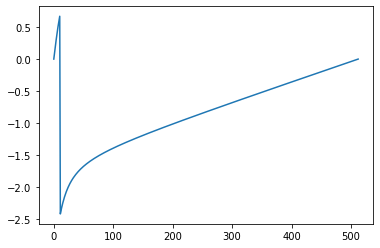

In [21]:
plt.plot(np.unwrap(np.angle(X)))